<a href="https://colab.research.google.com/github/taichihaya/event/blob/master/%E3%82%A4%E3%83%99%E3%83%B3%E3%83%88%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%97%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **１．使用する言語・ツール**
### tableau  
データを可視化するときに使用するツールで、比較的容易に、美しく可視化できるのが特徴です。  
今回、解約に関する基礎集計はtableauを使用します。

### Python  
機械学習や統計分析でよく使用されるプログラミング言語です。<br>
今回、予測モデルの作成はPythonを使用します。

### jupyter notebook  
Pythonで作成したプログラムを実行、結果を記録しながらデータ分析を進めるためのツールです。 
### Google Colaboratory  
jupyter notebook を設定不要で、インターネット環境があれば無料で利用できるサービスです。


# **２．解約に関する基礎集計**  
tableauで作成したダッシュボードを用意しているので、URLにアクセスしてください。  
https://public.tableau.com/profile/taichi.hayakawa#!/vizhome/teleco0104/1

# **３．予測モデルの作成**

## **3-1．データ取り込み、モデル作成準備**
セルにカーソルを合わせて「Shift+Enter」を押してください  
（ここは特に説明はせず、ただ実行してもらう想定）


In [0]:
###### 日本語フォントを使用できるようにする ######
!apt-get -y install fonts-ipafont-gothic
!rm /root/.cache/matplotlib/fontlist-v310.json

###### ライブラリのインストール ######
!pip install dtreeviz
import pandas as pd
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import dtreeviz
import warnings
warnings.filterwarnings("ignore")

###### データの取り込み ######
modeling_data_url = 'https://raw.githubusercontent.com/taichihaya/event/master/modeling_data.csv'
modeling_data = pd.read_csv(modeling_data_url, error_bad_lines=False)


###### モデルの作成、結果の可視化 ######
def display_result():
  # データを選択した変数に絞る
  selected_data = modeling_data[[dropdown1.value,dropdown2.value,dropdown3.value,dropdown4.value,dropdown5.value]]
  # 訓練用、テスト用に分割
  X_train, X_test, y_train, y_test = train_test_split(selected_data,modeling_data['解約'], random_state=11)
  # 学習
  clf = DecisionTreeClassifier(max_depth=parameter.value,random_state=11)
  clf.fit(X_train, y_train)

  # 正解率の算出
  print('訓練データの正解率：{:.2%}'.format(clf.score(X_train, y_train)))
  print('テストデータの正解率：{:.2%}'.format(clf.score(X_test, y_test)))

  viz = dtreeviz(clf,X_train,y_train,target_name='target',
                feature_names=selected_data.columns.to_list(),
                class_names=[0,1],fontname='IPAGothic',
                scale=1.0,label_fontsize=14,ticks_fontsize=14,fancy=False) 
  display(viz)

###### 変数・パラメータ選択に使用するドロップダウン、スライダーの作成 ######

# IDと正解ラベルは変数の選択肢から外す
col = [e for e in modeling_data.columns if e != 'ID' and e != '解約']

# 変数選択用ドロップダウンの作成
dropdown1 = widgets.Dropdown(options=col,description='変数1:')
dropdown2 = widgets.Dropdown(options=col,description='変数2:')
dropdown3 = widgets.Dropdown(options=col,description='変数3:')
dropdown4 = widgets.Dropdown(options=col,description='変数4:')
dropdown5 = widgets.Dropdown(options=col,description='変数5:')
variables = VBox(children=[dropdown1,dropdown2,dropdown3,dropdown4,dropdown5])

# パラメータ設定用スライダーの作成
parameter = widgets.IntSlider(min=2,max=8,description='木の深さ')


###### コンペ正解率確認用 ######
def display_competition_result():
  competition_data_url = 'https://raw.githubusercontent.com/taichihaya/event/master/competition_data.csv'
  competition_data = pd.read_csv(competition_data_url, error_bad_lines=False)
  # 選択した変数のデータフレームの作成
  selected_data = modeling_data[[dropdown1.value,dropdown2.value,dropdown3.value,dropdown4.value,dropdown5.value]]
  # 訓練用、テスト用に分割
  X_train, X_test, y_train, y_test = train_test_split(selected_data,modeling_data['解約'], random_state=11)
  # 学習
  clf = DecisionTreeClassifier(max_depth=parameter.value,random_state=11)
  clf.fit(X_train, y_train)

  # 選択した変数のデータフレームの作成
  competition_X = competition_data[[dropdown1.value,dropdown2.value,dropdown3.value,dropdown4.value,dropdown5.value]]
  competition_y = competition_data['解約']

  print('最終正解率：{:.2%}'.format(clf.score(competition_X, competition_y)))

# 実行結果を削除
from IPython.display import clear_output
clear_output()

## 3-2．変数、パラメータの選択
下のセルを「Shift+Enter」で実行した後、使用する変数とパラメータを設定してください  
※実行するのは最初の1回のみでOK

In [2]:
# 表示
VBox(children=[variables,parameter])

## 3-3．結果の表示
変数とパラメータを設定したあと、下記のセルを「Shift+Enter」で実行してください。  
作成された決定木と、モデルの正解率が出力されます。  
様々な変数・パラメータの組み合わせを試して、正解率の高いモデルを目指しましょう！

訓練データの正解率：84.64%
テストデータの正解率：76.70%


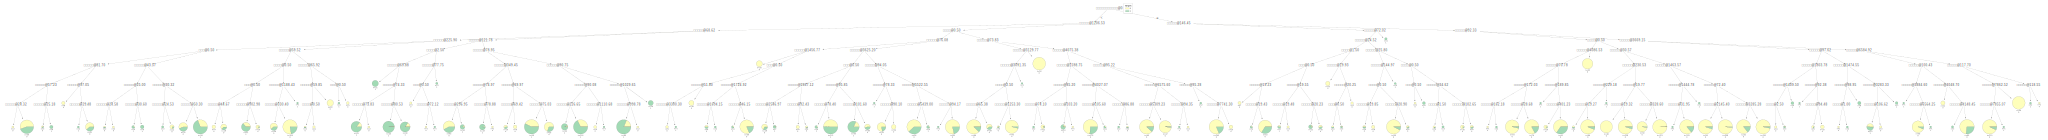

In [5]:
display_result()

各グループのチューニング終了後、下記コマンドをベタ打ちしてもらう  
⇒グループごとに最終正解率を発表  
の流れを想定。コマンドはパワポのスライドを用意する予定  
（「display_competition_result()と入力してください」的なもの）

In [6]:
# ここはイベント当日に参加者にベタ打ちしてもらう
display_competition_result()

最終正解率：77.20%
